In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [12]:
df = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0

In [13]:
df.drop(columns=['id'], inplace=True)

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   21                1         35.0                   0         65101.0   
1   43                1         28.0                   0         58911.0   
2   25                1         14.0                   1         38043.0   
3   35                1          1.0                   0          2630.0   
4   36                1         15.0                   1         31951.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                 124.0      187         0         True                 False   
1                  26.0      288         1         True                 False   
2                 152.0      254         0        False                  True   
3                 156.0       76         0        False                 False   
4                 152.0      294         0        False                 False   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                  False                True  
1                   True                True  
2                  False               False  
3                  False                True  
4                  False               False

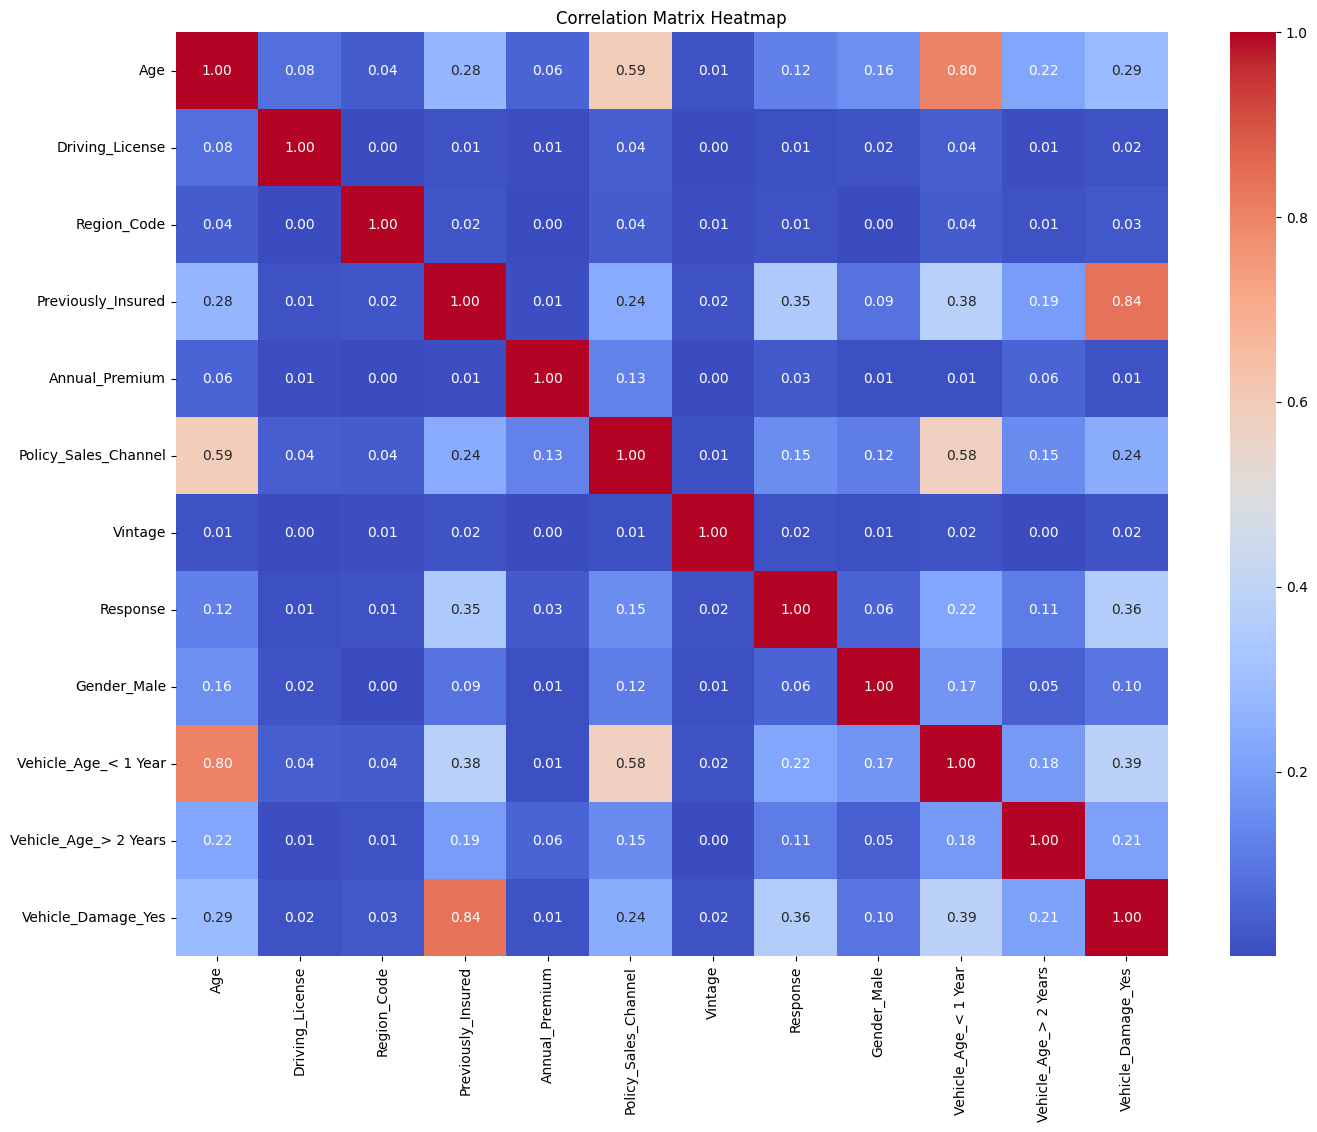

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
numerical_features = ['Age', 'Annual_Premium', 'Vintage', 'Region_Code']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded.head()


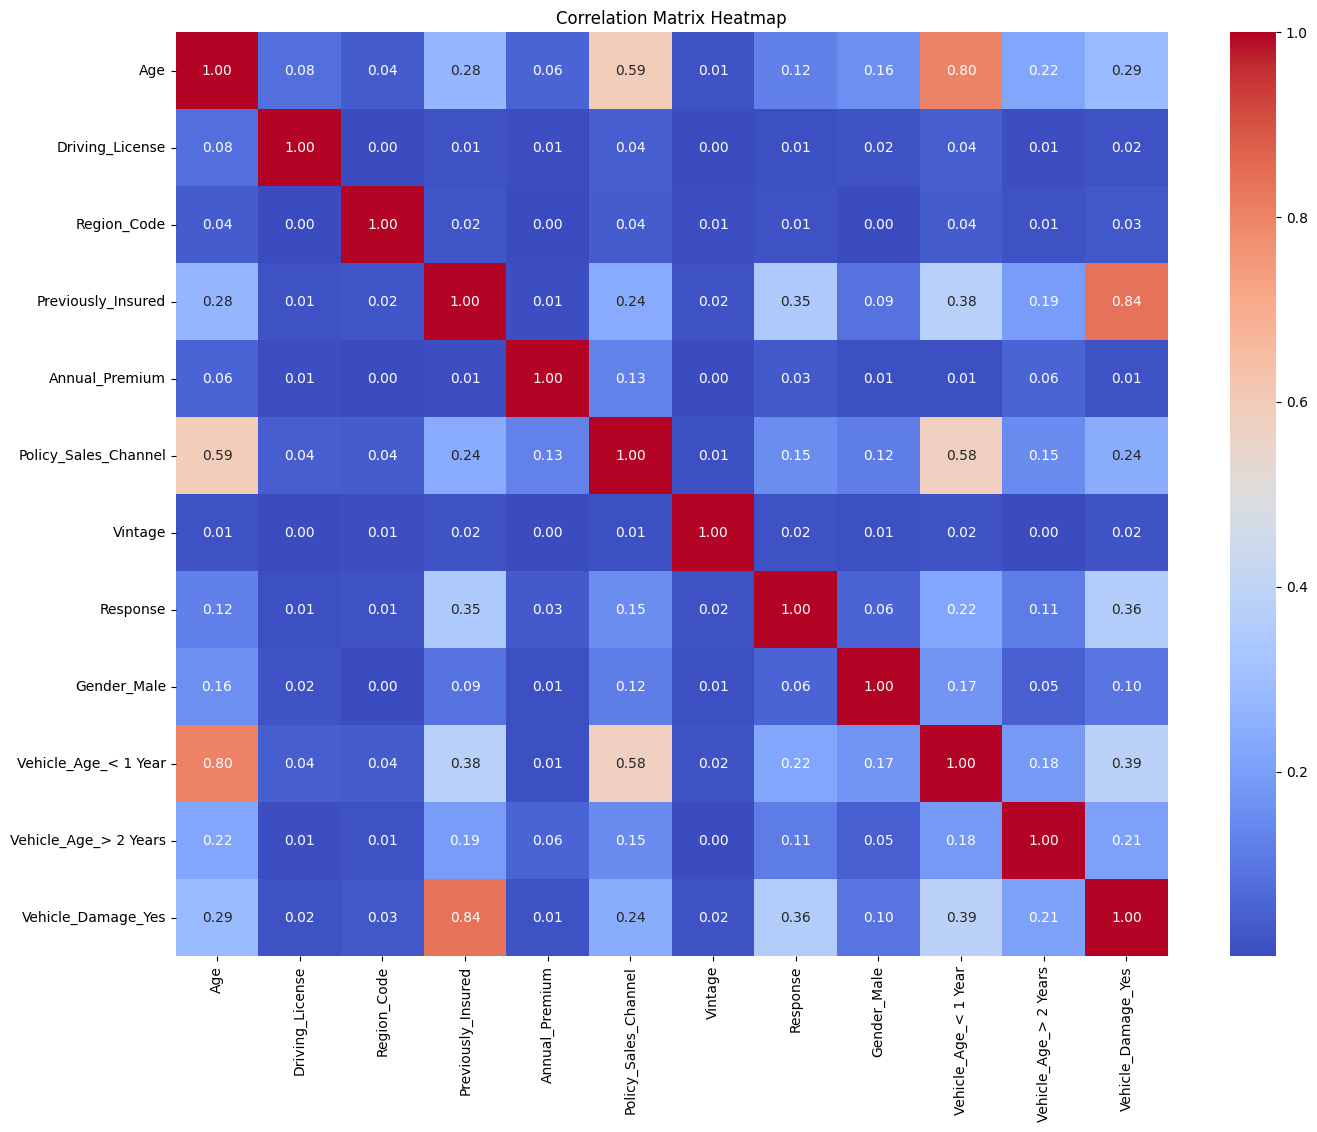

In [18]:
corr_matrix = df_encoded.corr().abs()
corr_matrix.head()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [20]:
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(to_drop)

[]


In [21]:
df_final = df_encoded.drop(columns=to_drop)